### Dataset : 'creative_cleaned.csv'

Exploratory Data Analysis and Initial patterns and trends for Low-Fi Pitch



## Import and Explore the data

## Prepare the workstation

In [1]:
# Import the necessary libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the figure size.
sns.set(rc={'figure.figsize':(12, 8)})



#### Load the dataset and sense-check 
  *(Ensure dataset is in current working directory)*

In [3]:
# Load the dataset 
df = pd.read_csv('creative_cleaned.csv')

# View the dataframe
df.head()

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group
0,FY22,Single image,0,2022-05-19,119,63,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.26,1.0
1,FY22,Single image,0,2022-05-19,9,8,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.15,1.0
2,FY22,Single image,0,2022-05-19,26,17,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.38,1.0
3,FY22,Single image,0,2022-05-19,12,10,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.19,1.0
4,FY22,Single image,1,2022-05-19,247,150,1,Facebook,CloserTwins,EarlyBird,0,0,0,0.004049,0.0,0.0,3.62,1.0


In [4]:
# Sense check the data sets to determine shape, data types and column names
print('Shape of dataset:\n',df.shape)
print('\nDatatypes:\n',df.dtypes)
print('\nColumns : \n',df.columns)

Shape of dataset:
 (101664, 18)

Datatypes:
 Campaign               object
Ad_Format              object
Clicks                  int64
Date                   object
Impressions             int64
Reach                   int64
Audience               object
Platform               object
Creative_Family        object
Creative_Version       object
100%_Video_Views        int64
Video_Starts            int64
Follows                 int64
CTR                   float64
CTR_Score             float64
Weighted_CTR_Score    float64
Spend                 float64
Target_Group          float64
dtype: object

Columns : 
 Index(['Campaign', 'Ad_Format', 'Clicks', 'Date', 'Impressions', 'Reach',
       'Audience', 'Platform', 'Creative_Family', 'Creative_Version',
       '100%_Video_Views', 'Video_Starts', 'Follows', 'CTR', 'CTR_Score',
       'Weighted_CTR_Score', 'Spend', 'Target_Group'],
      dtype='object')


In [5]:
# Determine the metadata of the data set.
# This gives us information about the columns in the dataframe and their datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101664 entries, 0 to 101663
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Campaign            101664 non-null  object 
 1   Ad_Format           101664 non-null  object 
 2   Clicks              101664 non-null  int64  
 3   Date                101664 non-null  object 
 4   Impressions         101664 non-null  int64  
 5   Reach               101664 non-null  int64  
 6   Audience            101664 non-null  object 
 7   Platform            101664 non-null  object 
 8   Creative_Family     101664 non-null  object 
 9   Creative_Version    101664 non-null  object 
 10  100%_Video_Views    101664 non-null  int64  
 11  Video_Starts        101664 non-null  int64  
 12  Follows             101664 non-null  int64  
 13  CTR                 101664 non-null  float64
 14  CTR_Score           101664 non-null  float64
 15  Weighted_CTR_Score  101664 non-nul

## Exploratory Data Analysis

In [6]:
# Grouping the data based on Creative_Family across the target groups to determine the 'Impressions'
family_tg = df.loc[(df['Creative_Family']!= 'Other') & (df['Creative_Family']!='No Answer')].\
groupby(['Creative_Family', 'Target_Group'])['Impressions'].sum().reset_index().\
sort_values(by='Impressions',ascending=False)
family_tg

,Creative_Family,Target_Group,Impressions
8,UnfairAdvantage,2.0,14590307
3,CloserTwins,2.0,9812880
4,CloserTwins,3.0,7397016
1,CloseFaster,2.0,4269441
7,UnfairAdvantage,1.0,4093042
2,CloserTwins,1.0,2708066
0,CloseFaster,1.0,1805930
5,CompetitiveOpportunity,3.0,276361
6,SEM Ads,3.0,66693


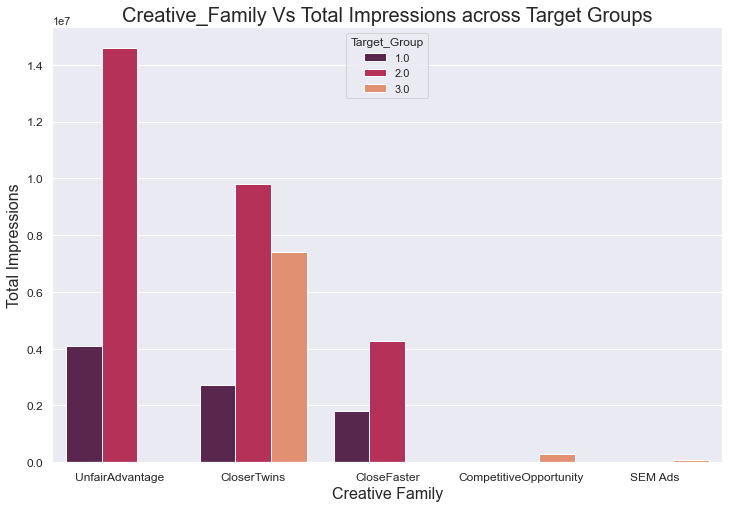

In [7]:
# Plot the family_tg dataframe
sns.barplot(x='Creative_Family',y = 'Impressions', hue = 'Target_Group', data = family_tg, palette = 'rocket')
plt.xlabel('Creative Family',fontsize = 16)
plt.ylabel('Total Impressions', fontsize=16)
plt.title('Creative_Family Vs Total Impressions across Target Groups', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

In [8]:
# Grouping based on 'Platform' and 'Target_Group' to determine sum of 'Impressions'
platform_tg = df.groupby(['Platform', 'Target_Group'])['Impressions'].\
sum().reset_index().sort_values(by='Impressions', ascending=False)
platform_tg

,Platform,Target_Group,Impressions
1,Domain Display,2.0,19564371
9,OTT,3.0,7348177
12,User ID Display,2.0,5998098
11,User ID Display,1.0,5033150
7,LinkedIn,2.0,3165406
0,Domain Display,1.0,2739642
8,LinkedIn,3.0,1347888
10,Trade Media,3.0,566118
6,LinkedIn,1.0,516285
3,Facebook,1.0,262991


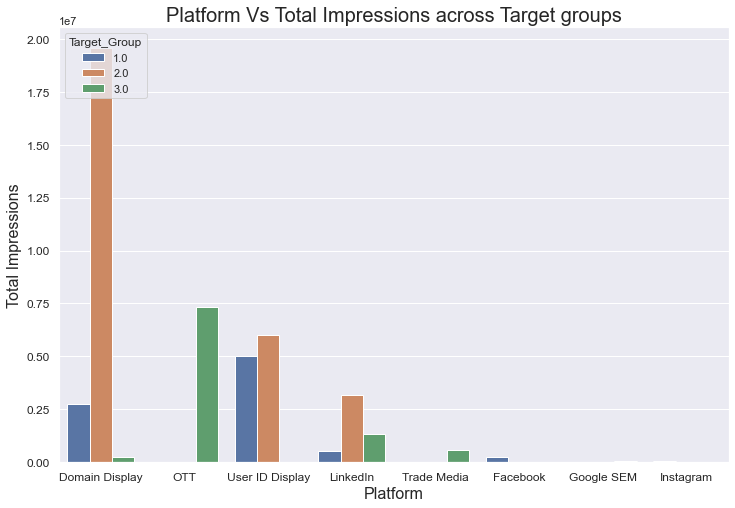

In [9]:
# Plot the platform_tg dataframe
sns.barplot(x='Platform',y = 'Impressions', hue = 'Target_Group', data = platform_tg)
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Total Impressions', fontsize=16)
plt.title('Platform Vs Total Impressions across Target groups', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

In [10]:
# Determine mean of numeric values for all Creative Families
df.loc[(df['Creative_Family']!='Other') & (df['Creative_Family']!='No Answer')].groupby('Creative_Family').mean()

,Clicks,Impressions,Reach,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group
Creative_Family,,,,,,,,,,,
CloseFaster,0.697845,393.253350,148.157292,0.000000,0.000000,0.0,0.003381,0.656580,283.046573,3.718318,1.474917
CloserTwins,0.368856,519.617082,206.210138,64.177476,99.454216,0.0,0.001851,0.369287,192.846016,10.247836,1.910649
CompetitiveOpportunity,3.271930,2424.219298,491.385965,0.000000,0.000000,0.0,0.001939,0.679825,1462.513158,28.605593,3.000000
SEM Ads,1.443051,7.743295,0.000000,0.000000,0.000000,0.0,0.121078,0.000000,0.000000,1.007123,3.000000
UnfairAdvantage,0.705497,489.310662,107.790064,0.000000,0.000000,0.0,0.002257,0.610520,312.981196,5.686906,1.440301


In [11]:
# Total Spend and Spend % on each target group
df_spend = df.groupby('Target_Group')['Spend'].sum().reset_index()
df_spend['Spend%'] = ((df_spend['Spend']/df_spend['Spend'].sum()) * 100).round(2)
df_spend

,Target_Group,Spend,Spend%
0,1.0,95231.226374,13.58
1,2.0,323236.933768,46.08
2,3.0,282974.028915,40.34


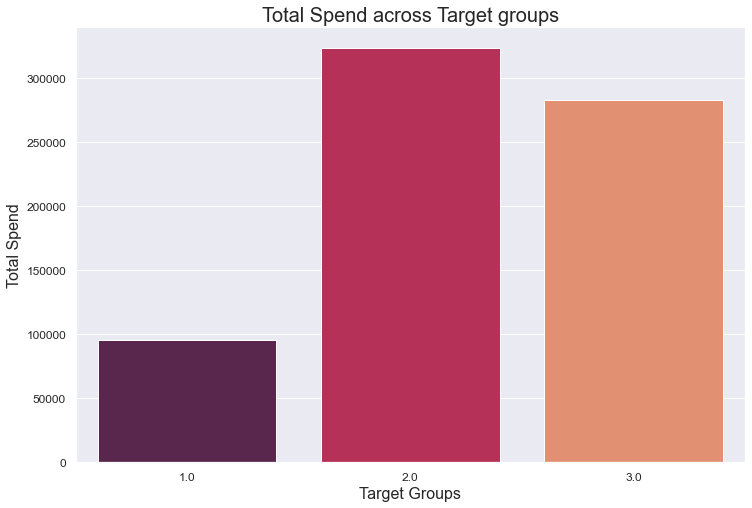

In [12]:
# Plot to show the spend  across each target group
sns.barplot(x = 'Target_Group', y = 'Spend', data = df_spend, palette='rocket')
plt.xlabel('Target Groups',fontsize = 16)
plt.ylabel('Total Spend', fontsize=16)
plt.title('Total Spend across Target groups', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

### Target Group dataframe subsets

#### Target Group 1 subset

In [13]:
# Target_Group = 1
tg1 = df.loc[df['Target_Group']== 1]
#cols = ['Creative_Family','Ad_Format','Platform','Spend','Clicks', 'Impressions','Reach', \
       # 'CTR', 'CTR_Score', 'Weighted_CTR_Score','100%_Video_Views','Video_Starts','Follows']
#tg1 = tg1[cols].reindex(cols, axis=1)
tg1.head()

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group
0,FY22,Single image,0,2022-05-19,119,63,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.26,1.0
1,FY22,Single image,0,2022-05-19,9,8,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.15,1.0
2,FY22,Single image,0,2022-05-19,26,17,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.38,1.0
3,FY22,Single image,0,2022-05-19,12,10,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.19,1.0
4,FY22,Single image,1,2022-05-19,247,150,1,Facebook,CloserTwins,EarlyBird,0,0,0,0.004049,0.0,0.0,3.62,1.0


#### Target Group 2 subset

In [14]:
# Target_Group = 2
tg2 = df.loc[df['Target_Group']==2]
tg2.head()

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group
501,4 - StackAdapt - Display - Image,Display,0,2022-04-23,366,93,4,Domain Display,CloseFaster,FasterAll,0,0,0,0.000000,0.5,183.0,1.770169,2.0
502,4 - StackAdapt - Audio,Audio,0,2022-04-25,366,129,4,Domain Display,CloserTwins,Cutdown1A,0,0,0,0.000000,0.5,183.0,5.021292,2.0
506,4 - StackAdapt - Display - Interactive ads (al...,Display - Interactive,0,2022-07-15,366,53,4,Domain Display,CloserTwins,CloseMore,0,0,0,0.000000,0.5,183.0,3.203899,2.0
522,5 - StackAdapt - Remarketing - Banner,Display,5,2022-05-08,4576,232,5,Domain Display,UnfairAdvantage,1099,0,0,0,0.001093,0.5,2288.0,22.458325,2.0
531,5 - StackAdapt - Remarketing - Banner,Display,0,2022-04-29,33,1,5,Domain Display,UnfairAdvantage,1099,0,0,0,0.000000,0.5,16.5,0.014483,2.0


#### Target Group 3


In [15]:
# Target_Group = 3
tg3 = df.loc[df['Target_Group']== 3]
tg3.head()

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group
8566,Housing Wire,Display,1,2022-09-04,197,0,General Targetting,Trade Media,Other,No Answer,0,0,0,0.005076,0.0,0.0,0.0,3.0
8732,Housing Wire,Display,1,2022-09-04,1897,0,General Targetting,Trade Media,Other,No Answer,0,0,0,0.000527,0.0,0.0,0.0,3.0
9096,Housing Wire,Display,1,2022-09-04,137,0,General Targetting,Trade Media,Other,No Answer,0,0,0,0.007299,0.0,0.0,0.0,3.0
9132,Housing Wire,Display,0,2022-09-04,19,0,General Targetting,Trade Media,Other,1099,0,0,0,0.000000,0.0,0.0,0.0,3.0
9268,Housing Wire,Display,0,2022-09-04,145,0,General Targetting,Trade Media,Other,NoDTI,0,0,0,0.000000,0.0,0.0,0.0,3.0


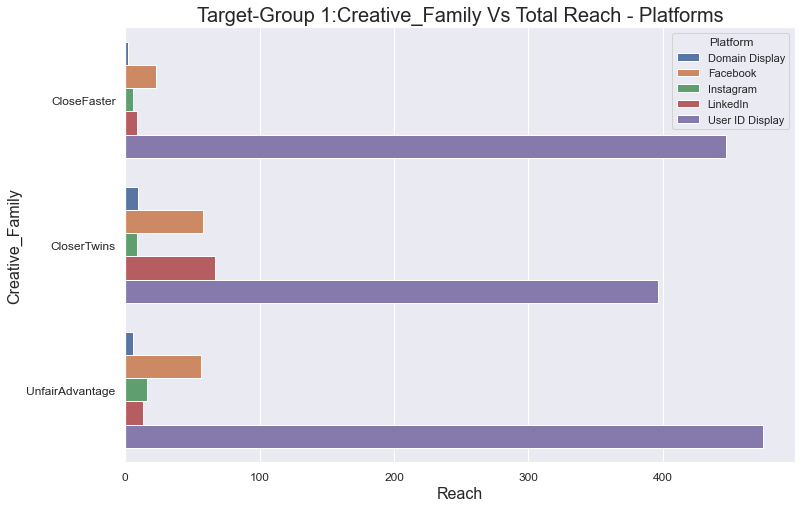

In [16]:
# Group Target_Group=1 on Platform and Creative_Family to determine total 'Reach'
fam_plat1 = tg1.loc[tg1['Creative_Family']!='Other'].groupby(['Platform','Creative_Family'])['Reach'].mean().reset_index()
sns.barplot(y='Creative_Family',x = 'Reach', hue = 'Platform', data = fam_plat1)
plt.xlabel('Reach',fontsize = 16)
plt.ylabel('Creative_Family', fontsize=16)
plt.title('Target-Group 1:Creative_Family Vs Total Reach - Platforms', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

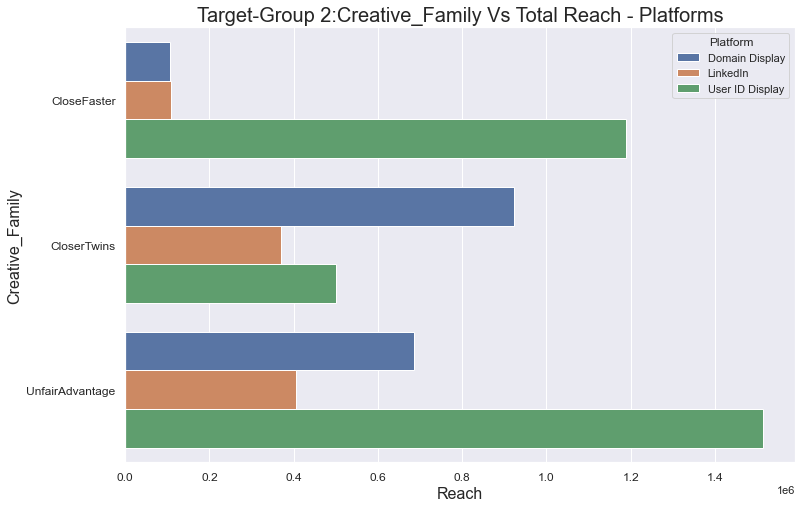

In [17]:
# Group Target_Group=2 on Platform and Creative_Family to determine total 'Reach'
fam_plat2 = tg2.loc[tg2['Creative_Family']!='Other'].groupby(['Platform','Creative_Family'])['Reach'].sum().reset_index()
sns.barplot(y='Creative_Family',x = 'Reach', hue = 'Platform', data = fam_plat2)
plt.xlabel('Reach',fontsize = 16)
plt.ylabel('Creative_Family', fontsize=16)
plt.title('Target-Group 2:Creative_Family Vs Total Reach - Platforms', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

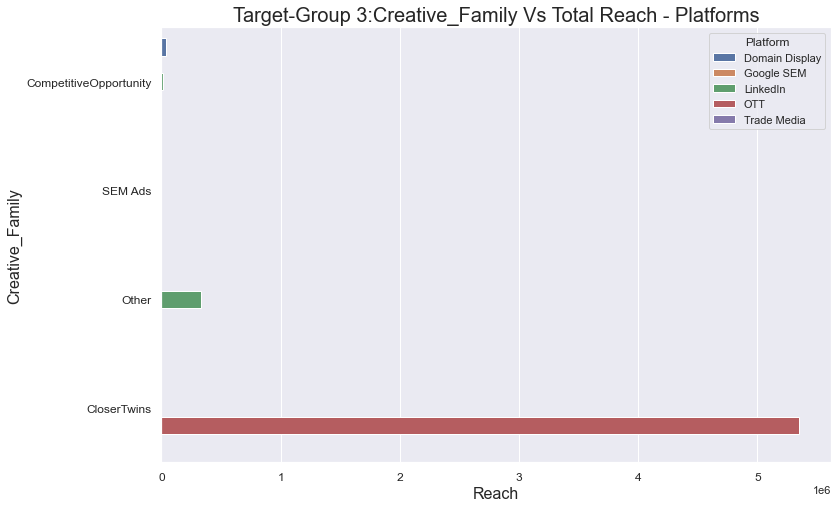

In [18]:
# Group Target_Group=3 on Platform and Creative_Family to determine total 'Reach'
fam_plat3 = tg3.groupby(['Platform','Creative_Family'])['Reach'].sum().reset_index()
sns.barplot(y='Creative_Family',x = 'Reach', hue = 'Platform', data = fam_plat3)
plt.xlabel('Reach',fontsize = 16)
plt.ylabel('Creative_Family', fontsize=16)
plt.title('Target-Group 3:Creative_Family Vs Total Reach - Platforms', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

 - CloserTwins on OTT platform has the best reach for Target Group 3

#### Create user-defined function for target groups based on  groupby  of required campaign element ['Platform'] or ['Creative_Family']

In [19]:
# User defined function : To create subsets for target groups based on column grouping and calculate CPC
def target_group(tg, column):
    tg_group = tg.groupby(column).agg({'CTR':'mean','Spend':'sum','Clicks':'sum',\
                                        'Impressions':'sum','Reach':'sum','Weighted_CTR_Score':'sum'
                                       }).reset_index()
    # Add new column 'CPC' to determine Cost per Click for platforms
    tg_group['CPC'] = tg_group['Spend']/tg_group['Clicks']
    return tg_group
    

#### Groupby 'Platform'

In [20]:
# Target group 1 platform grouping
tg1_plat = target_group(tg1, 'Platform')
tg1_plat

,Platform,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC
0,Domain Display,0.000462,23881.933135,1303,2739642,183363,1562301.0,18.328421
1,Facebook,0.006786,5023.482582,1818,262991,159565,0.0,2.763192
2,Instagram,0.004894,1023.677626,177,56001,29759,0.0,5.783489
3,LinkedIn,0.007642,39454.821303,935,516285,137836,296219.0,42.197670
4,User ID Display,0.006496,25847.311728,9286,5033150,2646138,3594606.0,2.783471


In [21]:
# Target group 2 platform grouping
tg2_plat = target_group(tg2, 'Platform')
tg2_plat

,Platform,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC
0,Domain Display,0.001320,133867.053908,18115,19564371,1715087,11694403.5,7.389846
1,LinkedIn,0.007533,160038.731038,10456,3165406,883345,2446067.0,15.305923
2,User ID Display,0.004334,29331.148822,10294,5998098,3204355,4205924.5,2.849344


In [22]:
# Target group 3 platform grouping
tg3_plat = target_group(tg3, 'Platform')
tg3_plat

,Platform,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC
0,Domain Display,0.000468,1275.127592,263,262110,42156,149696.5,4.848394
1,Google SEM,0.121078,8674.350000,12429,66693,0,0.0,0.697912
2,LinkedIn,0.001235,12390.641315,1024,1347888,347312,702625.0,12.100236
3,OTT,0.000000,249833.910000,0,7348177,5349629,0.0,inf
4,Trade Media,0.002449,10800.000008,445,566118,0,0.0,24.269663


#### Groupby 'Creative_Family' campaign

In [23]:
# Target group 1 campaign grouping
tg1_camp = target_group(tg1,'Creative_Family')
tg1_camp

,Creative_Family,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC
0,CloseFaster,0.003444,14083.132090,3282,1805930,885554,1244751.0,4.291021
1,CloserTwins,0.002694,41115.631535,3995,2708066,761241,1573166.0,10.291773
2,Other,0.021038,665.495891,25,1031,0,1129.5,26.619836
3,UnfairAdvantage,0.002435,39366.966858,6217,4093042,1509866,2634079.5,6.332148


In [24]:
# Target group 2 campaign grouping
tg2_camp = target_group(tg2,'Creative_Family')
tg2_camp

,Creative_Family,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC
0,CloseFaster,0.003312,43361.166342,7499,4269441,1403328,3128035.5,5.782260
1,CloserTwins,0.002623,101870.513593,10072,9812880,1793577,5819007.5,10.114229
2,Other,0.010372,229.080000,573,55247,0,82870.5,0.399791
3,UnfairAdvantage,0.002031,177776.173833,20721,14590307,2605882,9316481.5,8.579517


In [25]:
# Target group 3 campaign grouping
tg3_camp = target_group(tg3,'Creative_Family')
tg3_camp

,Creative_Family,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC
0,CloserTwins,0.000081,249833.910000,72,7397016,5349629,0.0,3469.915417
1,CompetitiveOpportunity,0.001939,3261.037592,373,276361,56018,166726.5,8.742728
2,Other,0.001295,21204.731323,1287,1850916,333450,685595.0,16.476093
3,SEM Ads,0.121078,8674.350000,12429,66693,0,0.0,0.697912


### Target Group 1

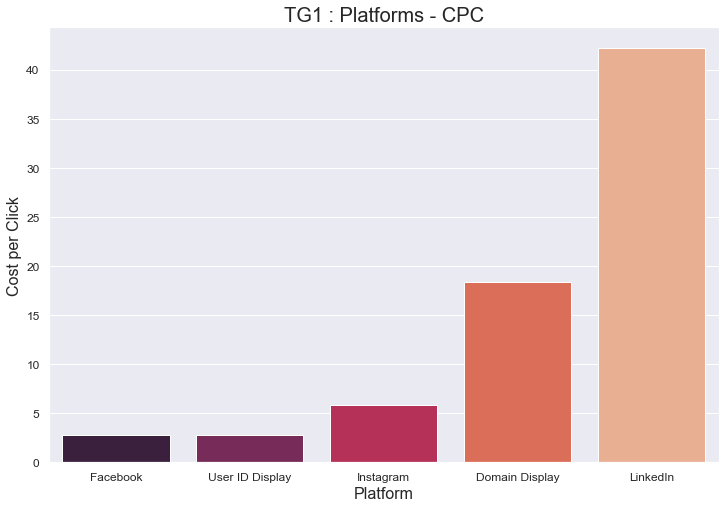

In [26]:
# TG1 : Plot Platform and Cost Per Click 
sns.barplot(x='Platform',y = 'CPC', data = tg1_plat.sort_values(by='CPC'), palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Cost per Click', fontsize=16)
plt.title('TG1 : Platforms - CPC', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

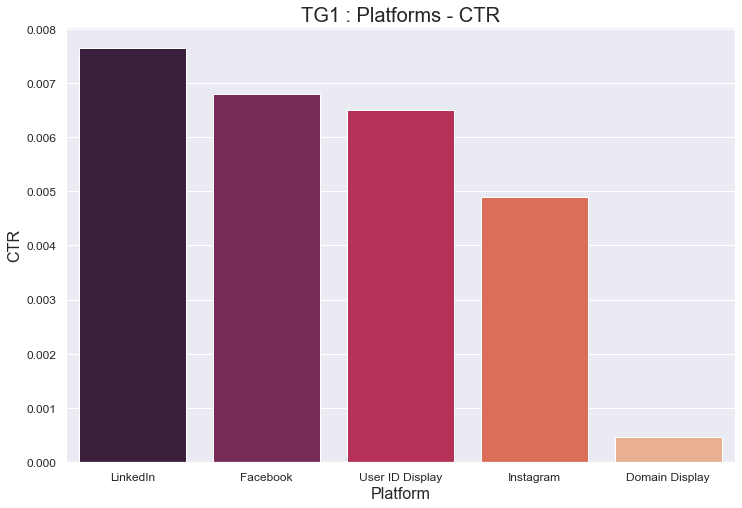

In [27]:
# TG1 : Plot Platform and CTR
sns.barplot(x='Platform',y = 'CTR', data = tg1_plat.sort_values(by='CTR',ascending=False), palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CTR', fontsize=16)
plt.title('TG1 : Platforms - CTR', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

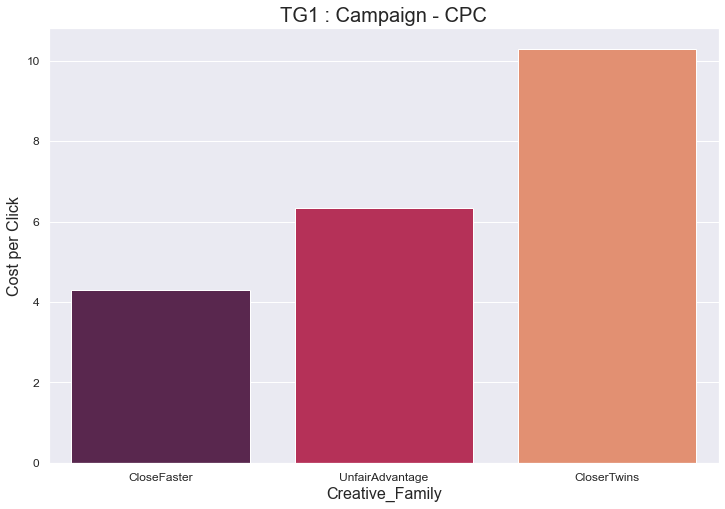

In [28]:
# TG1 : Plot Campaign and Cost Per Click
tg1_camp = tg1_camp.loc[tg1_camp['Creative_Family']!='Other']
sns.barplot(x='Creative_Family',y = 'CPC', data = tg1_camp.sort_values(by='CPC'), palette = 'rocket')
plt.xlabel('Creative_Family',fontsize = 16)
plt.ylabel('Cost per Click', fontsize=16)
plt.title('TG1 : Campaign - CPC', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

Target Group 1

CPC : 'Facebook' is the most cost effective platform
        - 'LinkedIn' is the most expensive

CTR: 'LinkedIn' has highest 
 
'CloseFaster' is the most cost effective in terms of CPC

### Target Group 2

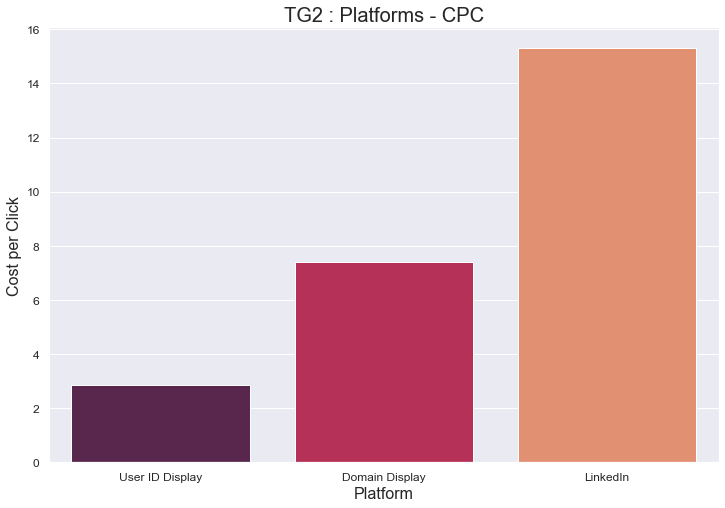

In [29]:
# TG2 : Plot Platform and Cost Per Click 
sns.barplot(x='Platform',y = 'CPC', data = tg2_plat.sort_values(by='CPC'), palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Cost per Click', fontsize=16)
plt.title('TG2 : Platforms - CPC', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

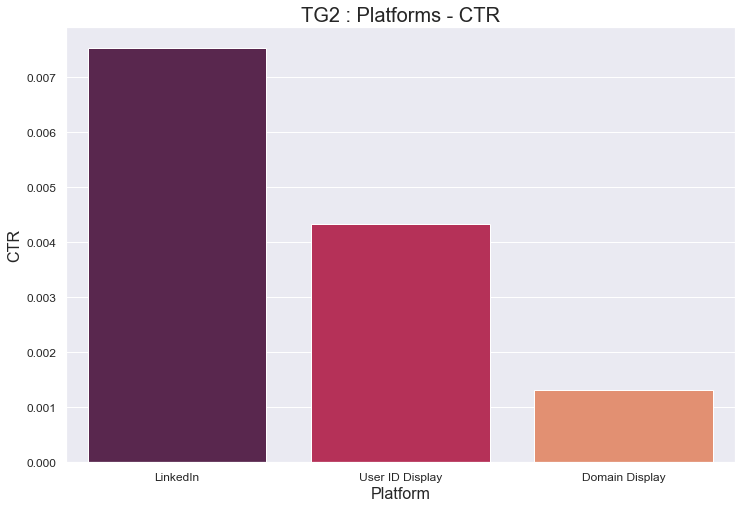

In [30]:
# TG2 : Plot Platform and CTR
sns.barplot(x='Platform',y = 'CTR', data = tg2_plat.sort_values(by='CTR',ascending=False), palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CTR', fontsize=16)
plt.title('TG2 : Platforms - CTR', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

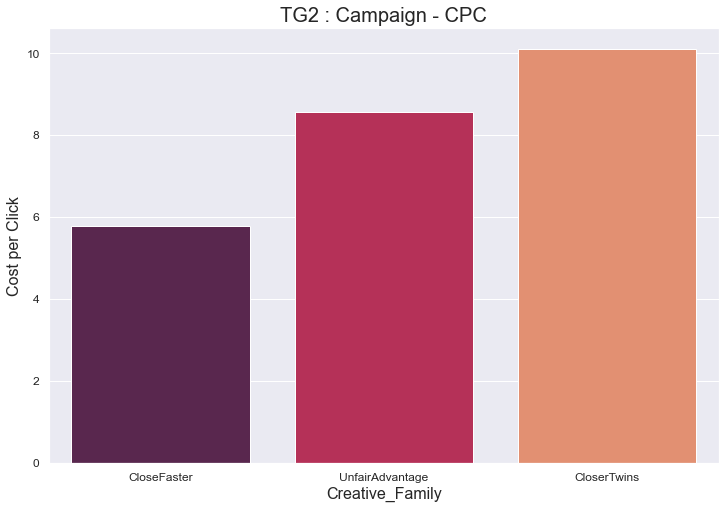

In [31]:
# TG2 : Plot Campaign and Cost Per Click
tg2_camp = tg2_camp.loc[tg2_camp['Creative_Family']!='Other']
sns.barplot(x='Creative_Family',y = 'CPC', data = tg2_camp.sort_values(by='CPC'), palette = 'rocket')
plt.xlabel('Creative_Family',fontsize = 16)
plt.ylabel('Cost per Click', fontsize=16)
plt.title('TG2 : Campaign - CPC', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

Target Group 2:

CPC: UserID Display is the best CPC, followed by Domain Display

CTR: LinkedIn has the highest

CloserFaster is the best cost effective campaign


### Target Group 3

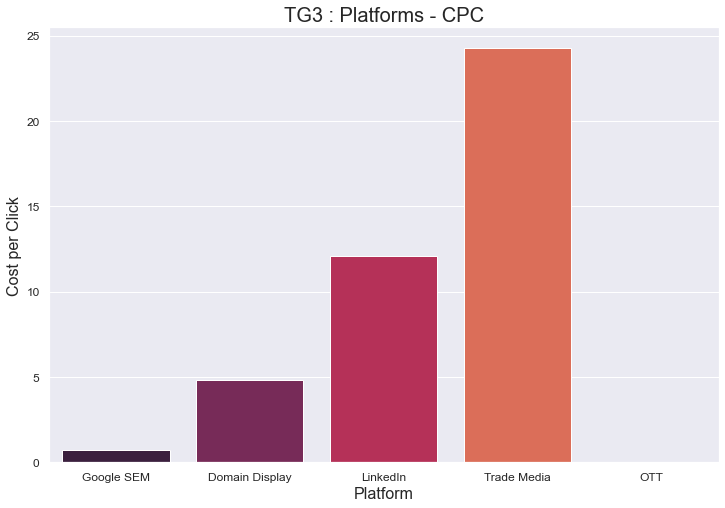

In [32]:
# TG3 : Plot Platform and Cost Per Click 
sns.barplot(x='Platform',y = 'CPC', data = tg3_plat.sort_values(by='CPC'), palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Cost per Click', fontsize=16)
plt.title('TG3 : Platforms - CPC', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

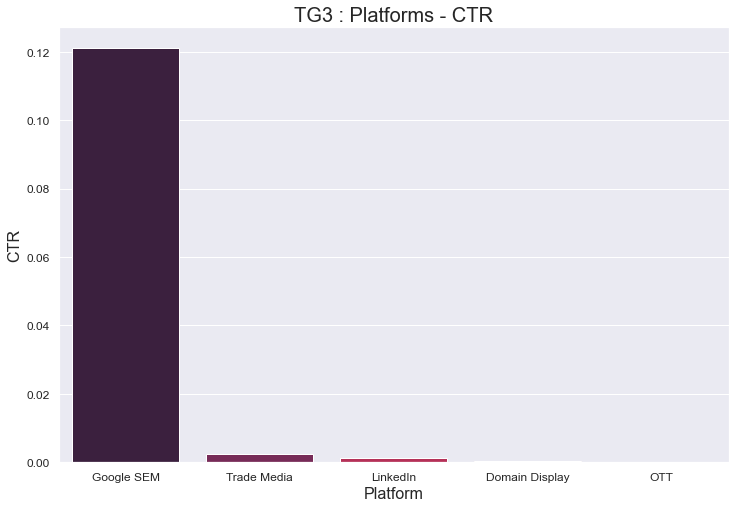

In [33]:
# TG3 : Plot Platform and CTR
sns.barplot(x='Platform',y = 'CTR', data = tg3_plat.sort_values(by='CTR',ascending=False), palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CTR', fontsize=16)
plt.title('TG3 : Platforms - CTR', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

'OTT' does not have 'Clicks'.
Looking at 'Impressions' instead

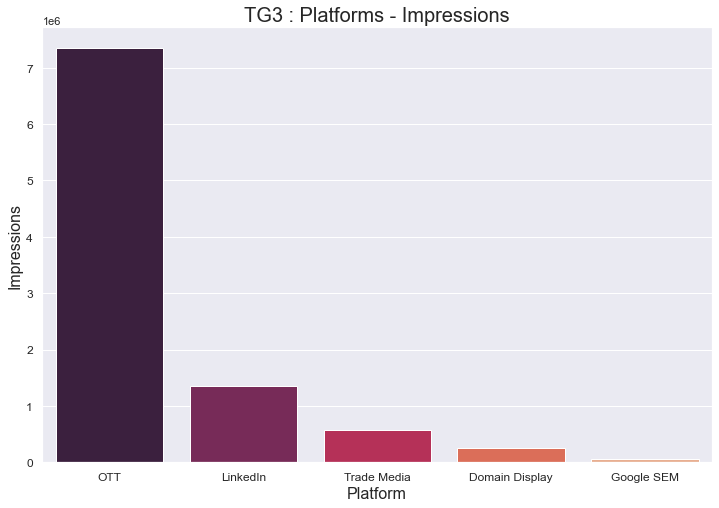

In [34]:
# TG3 : Plot Platform and Impressions
sns.barplot(x='Platform',y = 'Impressions', data = tg3_plat.sort_values(by='Impressions',ascending=False), palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Impressions', fontsize=16)
plt.title('TG3 : Platforms - Impressions', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

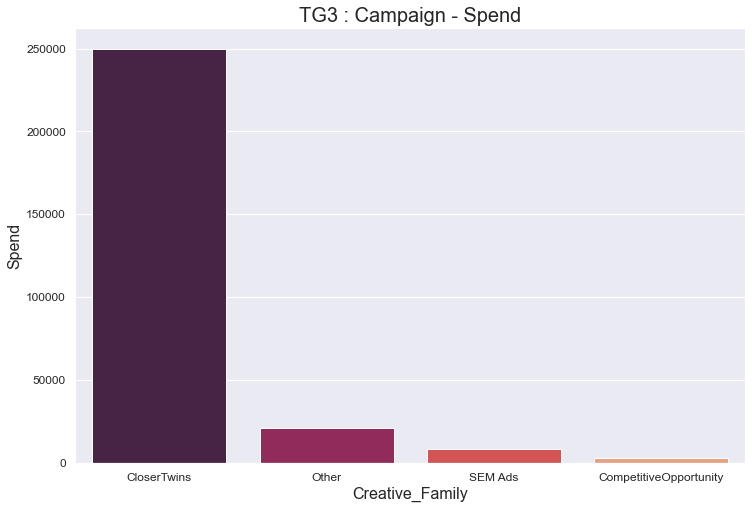

In [35]:
# TG3 : Plot Campaign and Spend
#tg3_camp = tg3_camp.loc[tg3_camp['Creative_Family']!='Other']
sns.barplot(x='Creative_Family',y = 'Spend', data = tg3_camp.sort_values(by='Spend',ascending=False), palette = 'rocket')
plt.xlabel('Creative_Family',fontsize = 16)
plt.ylabel('Spend', fontsize=16)
plt.title('TG3 : Campaign - Spend', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

Target Group 3:

OTT platform does not have clicks. So looking at 'Impressions' across the platforms and campaigns

Impressions: OTT has the highest 

CloserTwins : most spend on this campaign



#### Final Weighted_CTR_Score 

In [36]:
# Final Weighted CTR across the platform  for the target groups
tg1_plat['Final_Wt_CTR'] = tg1_plat['Weighted_CTR_Score']/tg1_plat['Impressions']
tg2_plat['Final_Wt_CTR'] = tg2_plat['Weighted_CTR_Score']/tg2_plat['Impressions']
tg3_plat['Final_Wt_CTR'] = tg3_plat['Weighted_CTR_Score']/tg3_plat['Impressions']

In [37]:
# Final Weighted CTR across the platform  for the target groups
tg1_camp['Final_Wt_CTR'] = tg1_camp['Weighted_CTR_Score']/tg1_plat['Impressions']
tg2_camp['Final_Wt_CTR'] = tg2_camp['Weighted_CTR_Score']/tg2_camp['Impressions']
tg3_camp['Final_Wt_CTR'] = tg3_camp['Weighted_CTR_Score']/tg3_camp['Impressions']

In [38]:
tg2_camp

,Creative_Family,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC,Final_Wt_CTR
0,CloseFaster,0.003312,43361.166342,7499,4269441,1403328,3128035.5,5.782260,0.732657
1,CloserTwins,0.002623,101870.513593,10072,9812880,1793577,5819007.5,10.114229,0.592997
3,UnfairAdvantage,0.002031,177776.173833,20721,14590307,2605882,9316481.5,8.579517,0.638539


### Target Group 2 : Increase Engagement

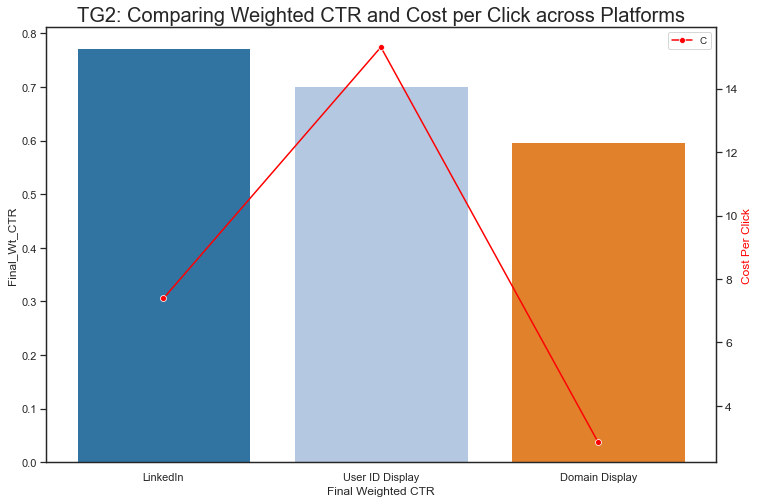

In [39]:
# TG2 : Plot for Final Wt_CTR and CPC across platforms
# Set the plot style as white.
sns.set_style('white')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.barplot(x = 'Platform',y = 'Final_Wt_CTR', palette = 'tab20',\
            data = tg2_plat.sort_values(by='Final_Wt_CTR',ascending=False), ax=ax1)

sns.lineplot(data=tg2_plat, x = 'Platform', y='CPC', ax = ax2 ,color='red', marker='o')

ax1.set_xlabel('Final Weighted CTR', fontsize=12)
ax2.set_ylabel('Cost Per Click', color='red', fontsize=12)

plt.title("TG2: Comparing Weighted CTR and Cost per Click across Platforms", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend("Cost Per Click", fontsize=10)

User ID Display has a good weighted CTR and is cost effective too


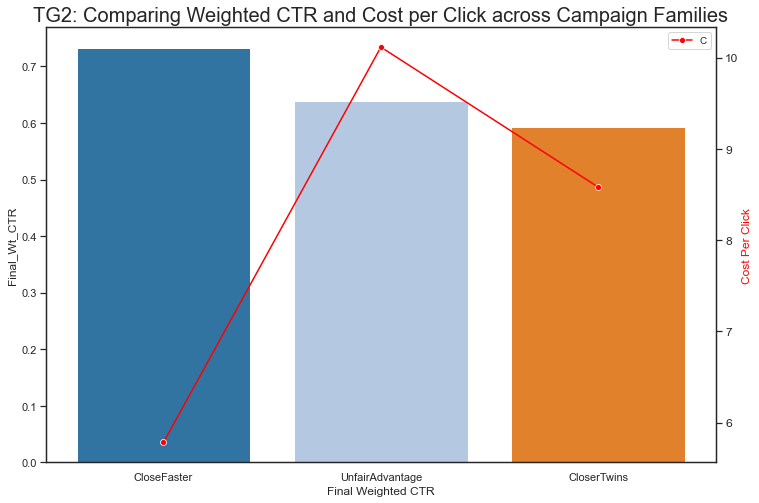

In [40]:
# Target Group 2
# Plot for Final Wt_CTR and CPC across campaigns
# Set the plot style as white.
sns.set_style('white')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.barplot(x = 'Creative_Family',y = 'Final_Wt_CTR', palette = 'tab20',\
            data = tg2_camp.sort_values(by='Final_Wt_CTR',ascending=False), ax=ax1)

sns.lineplot(data=tg2_camp, x = 'Creative_Family', y='CPC', ax = ax2 ,color='red', marker='o')

ax1.set_xlabel('Final Weighted CTR', fontsize=12)
ax2.set_ylabel('Cost Per Click', color='red', fontsize=12)

plt.title("TG2: Comparing Weighted CTR and Cost per Click across Campaign Families", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend("Cost Per Click", fontsize=10)

CloseFaster is the best cost effective campaign and also has the highest weighted CTR score in Target Group 2

### general-stats.csv dataset

In [41]:
#Load the general_stats csv 
df_general = pd.read_csv('general-stats_analysis.csv')

# View the dataframe
df_general.head()

,Date,Audience,Target_Group,Creative_Family,Creative_Version,Platform,Ad_Format,Campaign_Traffic,Total_Sessions,Total_Bounces,Total_Duration
0,16/8/2022,NaN,NaN,CloserTwins,Cutdown1A,Domain Display,Video,Campaign,1,0,73
1,16/6/2022,3.0,1.0,CloseFaster,NoDTI,Facebook,Single image,Campaign,1,0,0
2,29/8/2022,1.0,1.0,CloseFaster,MoreAll,User ID Display,NaN,Campaign,2,0,0
3,9/6/2022,4.0,2.0,UnfairAdvantage,1page,LinkedIn,Single image,Campaign,2,0,50
4,3/8/2022,1.0,1.0,UnfairAdvantage,1099,Domain Display,Single image,Campaign,1,0,0


#### Target group subsets for general-stats

In [42]:
# Target group = 1 for general_stats dataset
tg1_gen = df_general.loc[df_general['Target_Group']== 1]
cols = ['Creative_Family','Ad_Format','Platform','Total_Sessions','Total_Duration','Total_Bounces']
tg1_gen = tg1_gen[cols].reindex(cols,axis=1)
tg1_gen.head()

,Creative_Family,Ad_Format,Platform,Total_Sessions,Total_Duration,Total_Bounces
1,CloseFaster,Single image,Facebook,1,0,0
2,CloseFaster,NaN,User ID Display,2,0,0
4,UnfairAdvantage,Single image,Domain Display,1,0,0
7,CloserTwins,NaN,User ID Display,2,0,0
15,CloserTwins,NaN,Domain Display,1,0,0


In [43]:
# Target group = 2 for general_stats dataset
tg2_gen = df_general.loc[df_general['Target_Group']== 2]
cols = ['Creative_Family','Ad_Format','Platform','Total_Sessions','Total_Duration','Total_Bounces']
tg2_gen = tg2_gen[cols].reindex(cols,axis=1)
tg2_gen.head()

,Creative_Family,Ad_Format,Platform,Total_Sessions,Total_Duration,Total_Bounces
3,UnfairAdvantage,Single image,LinkedIn,2,50,0
5,CloserTwins,NaN,User ID Display,3,0,0
6,CloserTwins,NaN,Domain Display,2,0,0
11,UnfairAdvantage,Single image,LinkedIn,1,0,0
12,UnfairAdvantage,NaN,Domain Display,2,0,0


In [44]:
# Target group =3 for general_stats dataset
tg3_gen = df_general.loc[df_general['Target_Group']== 3]
cols = ['Creative_Family','Ad_Format','Platform','Total_Sessions','Total_Duration','Total_Bounces']
tg3_gen = tg3_gen[cols].reindex(cols,axis=1)
tg3_gen.head()


,Creative_Family,Ad_Format,Platform,Total_Sessions,Total_Duration,Total_Bounces
9,SEM Ads,CPC,Google SEM,5,184,0
14,others,Housingwire,Trade Media,4,1403,0
29,CloserTwins,Video,OTT,1,0,0
30,others,Housingwire,Trade Media,1,0,0
32,others,Housingwire,Trade Media,4,50,0


In [45]:
# tg2_gen -  Groupby 'Platform' 
tg2_gen_plt = tg2_gen.groupby('Platform')\
['Total_Sessions','Total_Duration','Total_Bounces'].sum().reset_index()

tg2_gen_plt

,Platform,Total_Sessions,Total_Duration,Total_Bounces
0,Domain Display,16638,452431,27
1,LinkedIn,8380,159279,0
2,User ID Display,14914,67426,1545


In [46]:
# Avg Website time
tg2_gen_plt['Avg_Engagement_Time'] = (tg2_gen_plt['Total_Duration']/tg2_gen_plt['Total_Sessions']).round(2)
tg2_gen_plt

,Platform,Total_Sessions,Total_Duration,Total_Bounces,Avg_Engagement_Time
0,Domain Display,16638,452431,27,27.19
1,LinkedIn,8380,159279,0,19.01
2,User ID Display,14914,67426,1545,4.52


In [47]:
#Merge platform groups for TG2
tg2_merge = pd.merge(tg2_plat,tg2_gen_plt, on = 'Platform')
tg2_merge

# Adding scoring
tg2_merge['CTR-Engagement'] =  (tg2_merge['Final_Wt_CTR'] * tg2_merge['Avg_Engagement_Time'])
tg2_merge = tg2_merge.sort_values(by='CTR-Engagement', ascending=False)
tg2_merge

,Platform,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC,Final_Wt_CTR,Total_Sessions,Total_Duration,Total_Bounces,Avg_Engagement_Time,CTR-Engagement
0,Domain Display,0.001320,133867.053908,18115,19564371,1715087,11694403.5,7.389846,0.59774,16638,452431,27,27.19,16.252546
1,LinkedIn,0.007533,160038.731038,10456,3165406,883345,2446067.0,15.305923,0.77275,8380,159279,0,19.01,14.689975
2,User ID Display,0.004334,29331.148822,10294,5998098,3204355,4205924.5,2.849344,0.70121,14914,67426,1545,4.52,3.169468


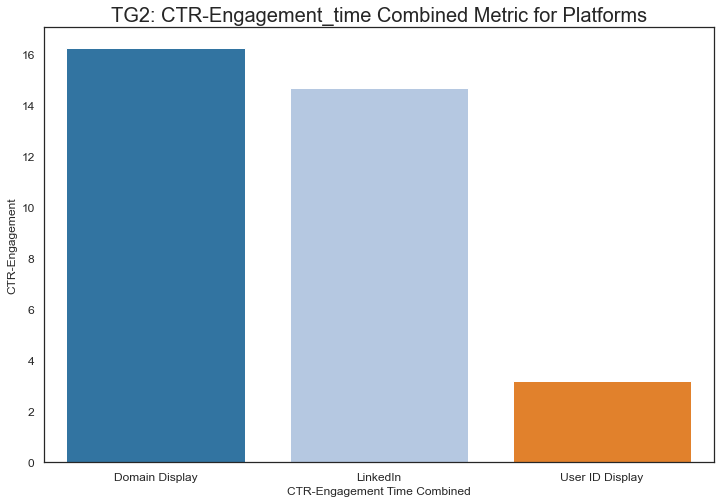

In [48]:
# Plot for CTR-Engagement Combined metric across platforms
sns.barplot(x = 'Platform',y = 'CTR-Engagement', palette = 'tab20',\
            data = tg2_merge.sort_values(by='CTR-Engagement',ascending=False))
plt.xlabel('CTR-Engagement Time Combined', fontsize=12)

plt.title("TG2: CTR-Engagement_time Combined Metric for Platforms", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)


- Domain Display platform seems the best in terms of combined Weighted cTR and Average Engagement time

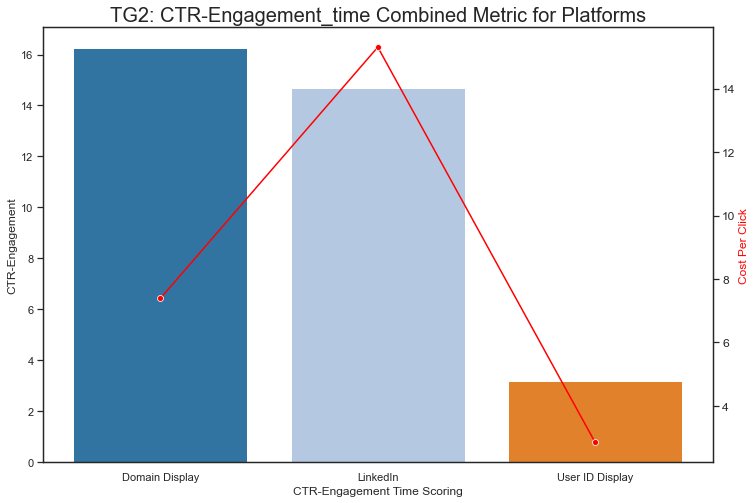

In [49]:
# Plot for CTR-Engagement Score VS CPC across platforms
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(x = 'Platform',y = 'CTR-Engagement', palette = 'tab20',data = tg2_merge, ax =ax1)
sns.lineplot(data=tg2_merge, x = 'Platform', y='CPC', ax = ax2 ,color='red', marker='o')

ax1.set_xlabel('CTR-Engagement Time Scoring', fontsize=12)
ax2.set_ylabel('Cost Per Click', color='red', fontsize=12)

plt.title("TG2: CTR-Engagement_time Combined Metric for Platforms", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
#plt.legend("Cost Per Click", fontsize=12)

Combining Final Weighted CTR and Average Website Engagement time, Domain Display is the best platform for Target group 2



In [50]:
tg2_merge

,Platform,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC,Final_Wt_CTR,Total_Sessions,Total_Duration,Total_Bounces,Avg_Engagement_Time,CTR-Engagement
0,Domain Display,0.001320,133867.053908,18115,19564371,1715087,11694403.5,7.389846,0.59774,16638,452431,27,27.19,16.252546
1,LinkedIn,0.007533,160038.731038,10456,3165406,883345,2446067.0,15.305923,0.77275,8380,159279,0,19.01,14.689975
2,User ID Display,0.004334,29331.148822,10294,5998098,3204355,4205924.5,2.849344,0.70121,14914,67426,1545,4.52,3.169468


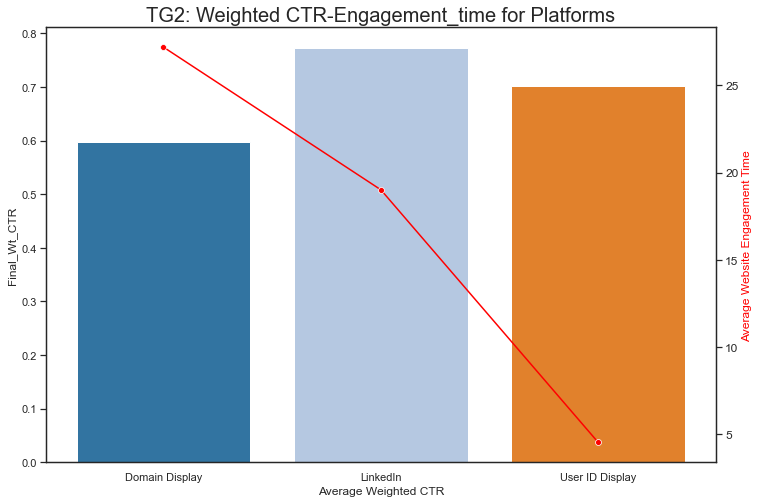

In [51]:
# Plot for Weighted CTR Vs Engagement time across platforms
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(x = 'Platform',y = 'Final_Wt_CTR', palette = 'tab20',\
            data = tg2_merge, ax =ax1)
sns.lineplot(data=tg2_merge, x = 'Platform', y='Avg_Engagement_Time', ax = ax2 ,color='red', marker='o')

ax1.set_xlabel('Average Weighted CTR', fontsize=12)
ax2.set_ylabel('Average Website Engagement Time', color='red', fontsize=12)

plt.title("TG2: Weighted CTR-Engagement_time for Platforms", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

User ID Display : High Weighted Ctr but low website engagement time

In [52]:
# Targer group :2  General-stats - Groupby 'Creative_Family' 
tg2_gen_camp = tg2_gen.loc[tg2_gen['Creative_Family']!='others'].groupby('Creative_Family')\
['Total_Sessions','Total_Duration','Total_Bounces'].sum().reset_index()

tg2_gen_camp

,Creative_Family,Total_Sessions,Total_Duration,Total_Bounces
0,CloseFaster,9583,91159,1545
1,CloserTwins,7375,99410,27
2,UnfairAdvantage,22524,487084,0


In [53]:
# Avg Website time
tg2_gen_camp['Avg_Engagement_Time'] = tg2_gen_camp['Total_Duration']/tg2_gen_camp['Total_Sessions']
# tg2_gen_plat['%Visits'] = ((tg2_gen_plat['count']/tg2_gen_plat['count'].sum())*100).round(2)
tg2_gen_camp

,Creative_Family,Total_Sessions,Total_Duration,Total_Bounces,Avg_Engagement_Time
0,CloseFaster,9583,91159,1545,9.512574
1,CloserTwins,7375,99410,27,13.479322
2,UnfairAdvantage,22524,487084,0,21.625111


In [54]:
tg2_camp

,Creative_Family,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC,Final_Wt_CTR
0,CloseFaster,0.003312,43361.166342,7499,4269441,1403328,3128035.5,5.782260,0.732657
1,CloserTwins,0.002623,101870.513593,10072,9812880,1793577,5819007.5,10.114229,0.592997
3,UnfairAdvantage,0.002031,177776.173833,20721,14590307,2605882,9316481.5,8.579517,0.638539


In [55]:
# Merge the campaign subsets
tg2_merge2 = pd.merge(tg2_camp,tg2_gen_camp, on = 'Creative_Family')
tg2_merge2

# Adding scoring
tg2_merge2['CTR-Engagement'] =  (tg2_merge2['Final_Wt_CTR'] * tg2_merge2['Avg_Engagement_Time'])
tg2_merge2 = tg2_merge2.sort_values(by='CTR-Engagement', ascending=False)
tg2_merge2

,Creative_Family,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC,Final_Wt_CTR,Total_Sessions,Total_Duration,Total_Bounces,Avg_Engagement_Time,CTR-Engagement
2,UnfairAdvantage,0.002031,177776.173833,20721,14590307,2605882,9316481.5,8.579517,0.638539,22524,487084,0,21.625111,13.808479
1,CloserTwins,0.002623,101870.513593,10072,9812880,1793577,5819007.5,10.114229,0.592997,7375,99410,27,13.479322,7.993196
0,CloseFaster,0.003312,43361.166342,7499,4269441,1403328,3128035.5,5.782260,0.732657,9583,91159,1545,9.512574,6.969453


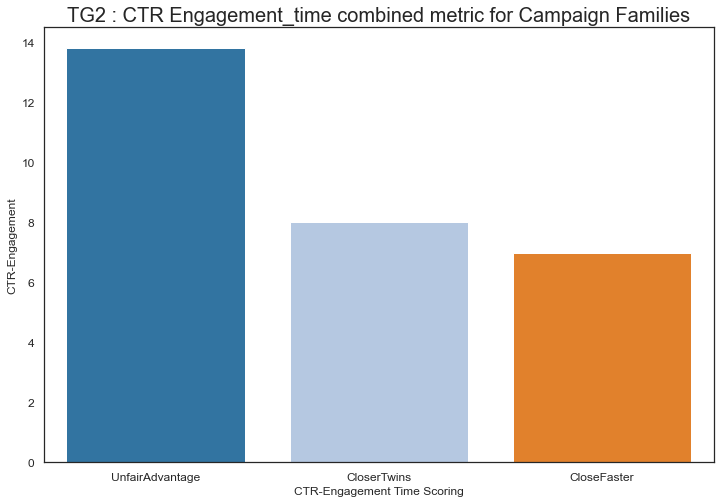

In [56]:
# Plot for CTR-Engagement combined metric across campaigns
sns.barplot(x = 'Creative_Family',y = 'CTR-Engagement', palette = 'tab20',data = tg2_merge2)
plt.xlabel('CTR-Engagement Time Scoring', fontsize=12)
plt.title("TG2 : CTR Engagement_time combined metric for Campaign Families", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)


Unfair Advantage has the highest Weighted cTR-Engagement time performance

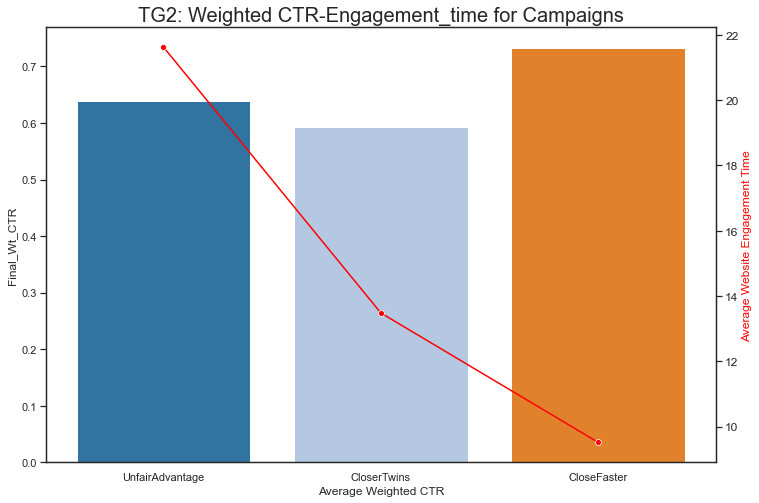

In [57]:
# Plot for Weighted CTR Vs Engagement time across campaigns
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(x = 'Creative_Family',y = 'Final_Wt_CTR', palette = 'tab20',\
            data = tg2_merge2, ax =ax1)
sns.lineplot(data=tg2_merge2, x = 'Creative_Family', y='Avg_Engagement_Time', ax = ax2 ,color='red', marker='o')

ax1.set_xlabel('Average Weighted CTR', fontsize=12)
ax2.set_ylabel('Average Website Engagement Time', color='red', fontsize=12)

plt.title("TG2: Weighted CTR-Engagement_time for Campaigns", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

Unfair Advantage has the best website engagement

CloseFaster has high Weighted CTR but very low website engagement time